In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('dataset_new.csv')

In [3]:
arr=np.array(data,dtype='float64')
n_rows=arr.shape[0]

In [4]:
data.head(10)

,Language_vocab,Memory,Speed,Visual_discrimination,Audio_Discrimination,Survey_Score
0,0.5,0.6,0.5,0.8,0.6,0.7
1,0.6,0.7,0.8,0.9,0.5,0.8
2,0.6,0.4,0.3,0.3,0.4,0.6
3,0.3,0.5,0.2,0.1,0.3,0.5
4,0.7,0.6,0.7,0.8,0.9,0.5
5,0.4,0.1,0.0,0.1,0.4,0.2
6,0.8,1.0,0.8,0.9,0.6,0.6
7,0.5,0.3,0.5,0.4,0.7,0.4
8,0.6,0.5,0.5,0.4,0.6,0.5
9,0.6,0.7,0.7,0.8,0.7,0.6


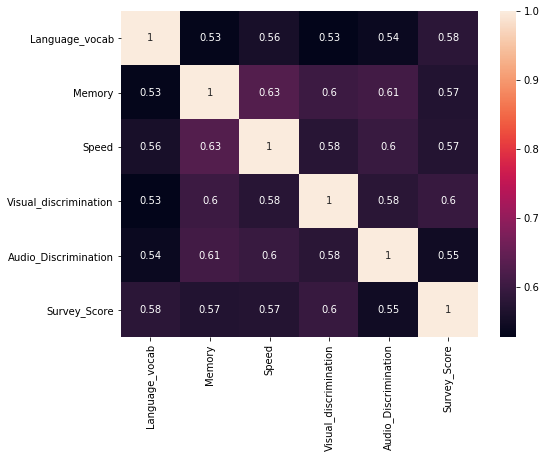

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

In [10]:
weights=[]
for i in range(5):
    weights.append(random.random())
weights.sort(reverse=True)
weights[0]*=4
weights[1]*=3
weights[3]*=0.75
weights[4]*=0.5
weights

[3.796767634200761,
 2.679110831912357,
 0.8519740822605654,
 0.36369415021960727,
 0.23414005424875212]

In [19]:
def rule(a):
    if(a<0.3):
        return 0
    if(a>0.4 and a<0.6):
        return 1
    if(a>0.7):
        return 2
    return -1
labels=np.zeros((n_rows,1))
for i in range(n_rows):
    temp=arr[i,].tolist()
    a=round((temp[0]*weights[0]+temp[1]*weights[1]+temp[2]*weights[2]+
             (temp[3]+temp[4])*weights[3]+temp[5]*weights[4])/10,1)
    b=rule(a)
    if(b==-1):
        if(a>=0.3 and a<=0.4):
            if((temp[0]+temp[1])/2<0.3):
                b=0
            elif((temp[0]+temp[1])/2>0.4):
                b=1
            elif(temp[2]<0.3):
                b=0
            elif(temp[2]>0.4):
                b=1
            elif((temp[3]+temp[4])/2<0.3):
                b=0
            elif((temp[3]+temp[4])/2>0.4):
                b=1
            elif(temp[5]<0.3):
                b=0
            elif(temp[5]>0.4):
                b=1
            else:
                b=0
        else:
            if((temp[0]+temp[1])/2<0.6):
                b=1
            elif((temp[0]+temp[1])/2>0.7):
                b=2
            elif(temp[2]<0.6):
                b=1
            elif(temp[2]>0.7):
                b=2
            elif((temp[3]+temp[4])/2<0.6):
                b=1
            elif((temp[3]+temp[4])/2>0.7):
                b=2
            elif(temp[5]<0.6):
                b=1
            elif(temp[5]>0.7):
                b=2
            else:
                b=1
    labels[i]=b

In [20]:
data1=pd.concat((data,pd.DataFrame(labels,columns=['Label'])),axis=1)

In [21]:
data1.to_csv('labelled_data_new.csv',index=False)

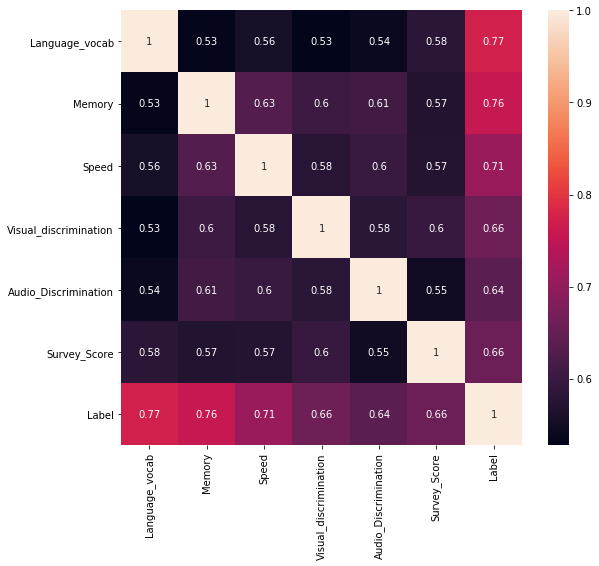

In [22]:
plt.figure(figsize=(9,8))
sns.heatmap(data1.corr(),annot=True)